In [7]:
#Install packages
%pip install pandas
%pip install numpy

#Setup
import pandas as pd
import numpy as np
import csv

import sys
sys.path.append('/Users/haydenharai/Desktop/Assignment 3')

import Hayden_Functions
import importlib
importlib.reload(Hayden_Functions)
print(dir(Hayden_Functions))

from Hayden_Functions import *

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'dataframe_individual_day', 'datetime', 'example', 'mean_of_multiple_days', 'pd']


In [ ]:
#Setup for total dataframe
#Initializing dataframes
life_science_df = pd.read_csv('life_sciences_msb1_main.csv')
life_science_pv_df = pd.read_csv('life_science_pv.csv')

#Changing first column of both dataframes to the unit 'datetime'
life_science_df['datetime'] = pd.to_datetime(life_science_df['datetime'])
life_science_pv_df['datetime'] = pd.to_datetime(life_science_pv_df['datetime'])

#Merging dataframes
life_science_total_df = pd.merge(life_science_df, life_science_pv_df, on='datetime', how='inner')
life_science_total_df['datetime'] = pd.to_datetime(life_science_total_df['datetime'])

#Sorting dataframes
life_science_total_df = life_science_total_df.sort_values(by='datetime')

#filling NaN with 0
life_science_total_df.fillna({'power_avg_pv_kw': 0}, inplace=True)
life_science_total_df.fillna({'power_avg_usage_kw': 0}, inplace=True)

#New column: power_avg_usage_kw - power_avg_pv_kw
life_science_total_df['power_avg_combined_kw'] = life_science_total_df['power_avg_usage_kw'] - life_science_total_df['power_avg_pv_kw']

#Export to csv
life_science_total_df.to_csv('life_science_total.csv', index = False)


In [10]:
#Obtaining days of interest
#Day with maximum PV value of generation
max_pv = life_science_total_df['power_avg_pv_kw'].idxmax()
max_pv_day = life_science_total_df.loc[max_pv, 'datetime'].date()
life_science_max_pv_day_df = dataframe_individual_day(life_science_total_df, max_pv_day)

#Day with minimum PV value of generation
min_pv = life_science_total_df['power_avg_pv_kw'].replace(0, np.nan).idxmin()
min_pv_day = life_science_total_df.loc[min_pv, 'datetime'].date()
life_science_min_pv_day_df = dataframe_individual_day(life_science_total_df, min_pv_day)

#Day with mean PV generation
mean_pv_day = mean_of_multiple_days(life_science_total_df, 'power_avg_pv_kw')
life_science_mean_pv_day_df = dataframe_individual_day(life_science_total_df, mean_pv_day)

#Day with maximum power usage
max_usage = life_science_total_df['power_avg_usage_kw'].idxmax()
max_usage_day = life_science_total_df.loc[max_usage, 'datetime'].date()
life_science_max_usage_day_df = dataframe_individual_day(life_science_total_df, max_usage_day)

#Day with minimum power usage
min_usage = life_science_total_df['power_avg_usage_kw'].replace(0, np.nan).idxmin()
min_usage_day = life_science_total_df.loc[min_usage, 'datetime'].date()
life_science_min_usage_day_df = dataframe_individual_day(life_science_total_df, min_usage_day)

#Day with mean power usage
mean_usage_day = mean_of_multiple_days(life_science_total_df, 'power_avg_usage_kw')
life_science_mean_usage_day_df = dataframe_individual_day(life_science_total_df, mean_usage_day)

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Mean Usage Day: 2024-07-15')

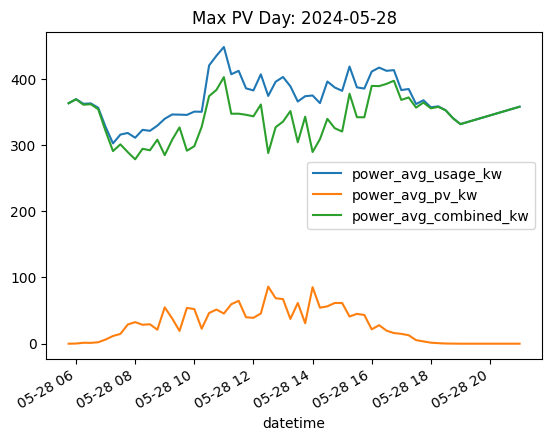

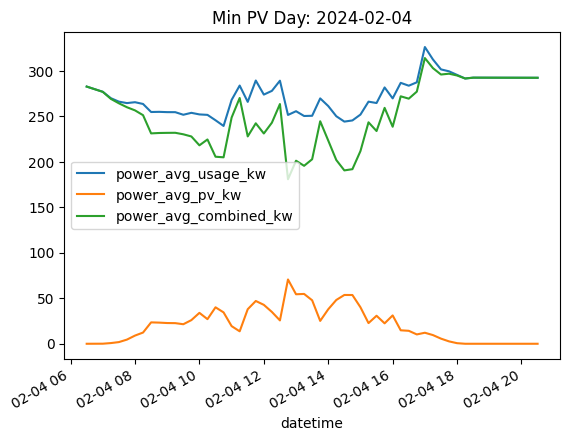

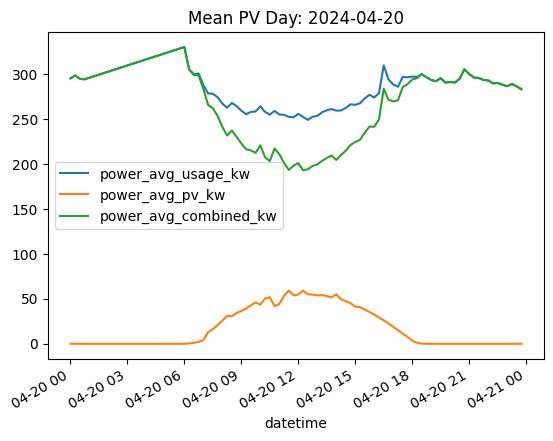

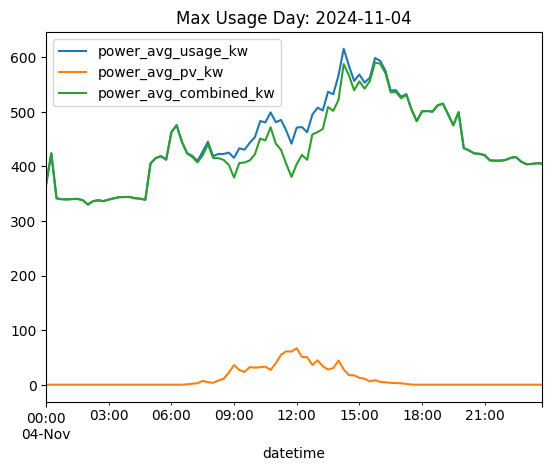

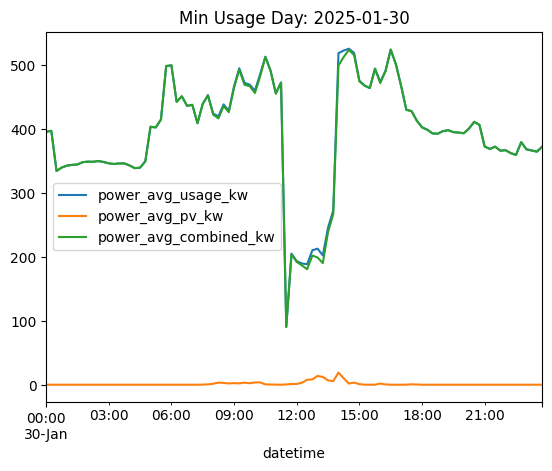

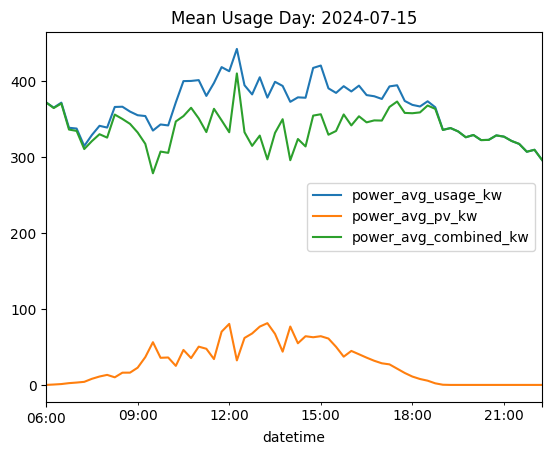

In [11]:
#Data visualization
%pip install matplotlib
import matplotlib.pyplot as plt

max_pv_plot = life_science_max_pv_day_df.plot(x = 'datetime', y = ['power_avg_usage_kw', 'power_avg_pv_kw', 'power_avg_combined_kw'])
max_pv_plot.set_title(f'Max PV Day: {max_pv_day}')

min_pv_plot = life_science_min_pv_day_df.plot(x = 'datetime', y = ['power_avg_usage_kw', 'power_avg_pv_kw', 'power_avg_combined_kw'])
min_pv_plot.set_title(f'Min PV Day: {min_pv_day}')

mean_pv_plot = life_science_mean_pv_day_df.plot(x = 'datetime', y = ['power_avg_usage_kw', 'power_avg_pv_kw', 'power_avg_combined_kw'])
mean_pv_plot.set_title(f'Mean PV Day: {mean_pv_day}')

max_usage_plot = life_science_max_usage_day_df.plot(x = 'datetime', y = ['power_avg_usage_kw', 'power_avg_pv_kw', 'power_avg_combined_kw'])
max_usage_plot.set_title(f'Max Usage Day: {max_usage_day}')

min_usage_plot = life_science_min_usage_day_df.plot(x = 'datetime', y = ['power_avg_usage_kw', 'power_avg_pv_kw', 'power_avg_combined_kw'])
min_usage_plot.set_title(f'Min Usage Day: {min_usage_day}')

mean_usage_plot = life_science_mean_usage_day_df.plot(x = 'datetime', y = ['power_avg_usage_kw', 'power_avg_pv_kw', 'power_avg_combined_kw'])
mean_usage_plot.set_title(f'Mean Usage Day: {mean_usage_day}')